In [5]:
#import dependenceis
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [6]:
#FINALIZED NOTEBOOK
#to include clean of ILI data, clean of clinical data, clean of weather data and merge of clinical + weather data

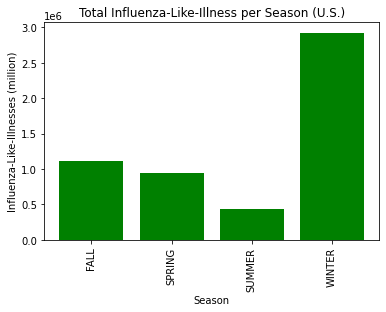

In [8]:
####clean of ILI data### #(NINA)#

ILI_data_path = '../OriginalData/ILINet.csv'
ILI_data = pd.read_csv(ILI_data_path, skiprows = 1)
ILI_df = pd.DataFrame(ILI_data)

#remove null values in full columns
ILI_drop = ILI_df.drop(columns = ['NUM. OF PROVIDERS', '% WEIGHTED ILI','AGE 0-4','AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64','AGE 65'])

#remove any rows that contain X
ILI_drop2 = ILI_drop[ILI_drop['%UNWEIGHTED ILI'] != 'X']
ILI_drop2 = ILI_drop[ILI_drop['ILITOTAL'] != 'X']

#convert datatypes of columns to int
ILI_drop2 = ILI_drop2[['YEAR', 'WEEK', 'ILITOTAL', 'TOTAL PATIENTS']].astype(int)
nxt_ILI = ILI_drop2

#clean weeks
weeks = nxt_ILI['WEEK']
season = []

for week in weeks:
    if week >= 51:
        season.append('WINTER')
    elif week >= 38:
        season.append('FALL')
    elif week >= 25:
        season.append('SUMMER')
    elif week >= 12:
        season.append('SPRING')
    elif week >=1:
        season.append('WINTER')
        
nxt_ILI['SEASON'] = season

season_df = nxt_ILI.groupby(['SEASON']).sum()['ILITOTAL']
season_df.head()

#ILI plot
plt.bar(season_df.index.values, season_df.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Influenza-Like-Illnesses (million)')
plt.title('Total Influenza-Like-Illness per Season (U.S.)')
plt.show()

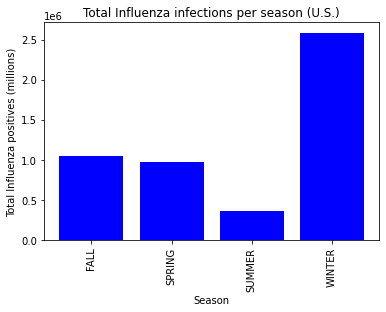

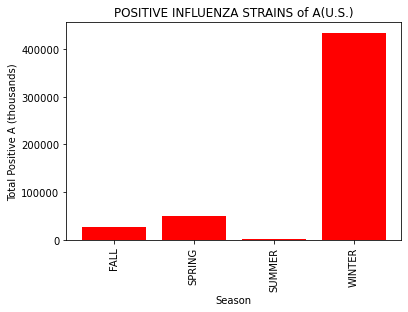

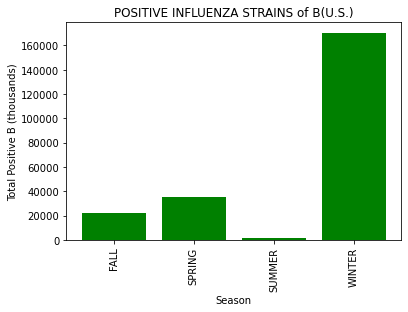

In [11]:
####clean of ILI data### #(BRIAN)#

clin_data_path = '../OriginalData/WHO_NREVSS_Clinical_Labs.csv'
clin_data = pd.read_csv(clin_data_path, skiprows = 1)
clin_df = pd.DataFrame(clin_data)

#clean column name
clin_df.rename(columns={'TOTAL SPECIMENS': 'TOTAL'}, inplace=True)

#remove region type
clin_drop = clin_df.drop(columns = 'REGION TYPE')

#remove rows containing X
clin_drop2 = clin_drop[clin_drop['TOTAL'] != 'X']
clin_drop2 = clin_drop[clin_drop['TOTAL A'] != 'X']
clin_drop2 = clin_drop[clin_drop['TOTAL B'] != 'X']
clin_drop2 = clin_drop[clin_drop['PERCENT POSITIVE'] != 'X']
clin_drop2 = clin_drop[clin_drop['PERCENT A'] != 'X']
clin_drop2 = clin_drop[clin_drop['PERCENT B'] != 'X']

#convert datatypes of columns to float
clin_drop2 = clin_drop2[['REGION', 'WEEK', 'YEAR','TOTAL', 'TOTAL A', 'TOTAL B', 'PERCENT POSITIVE', 'PERCENT A', 'PERCENT B']]
df_subset = clin_drop2

for column in df_subset.columns[3:]:
    df_subset[column] = df_subset[column].astype('float')

#clean weeks
nxt_clin = df_subset
weeks = nxt_clin['WEEK']
season = []

for week in weeks:
    if week >= 51:
        season.append('WINTER')
    elif week >= 38:
        season.append('FALL')
    elif week >= 25:
        season.append('SUMMER')
    elif week >= 12:
        season.append('SPRING')
    elif week >=1:
        season.append('WINTER')
        
nxt_clin['SEASON'] = season

season_df = nxt_clin.groupby('SEASON').sum()

#clinical plots

#Clin bar graph: x-axis = season (weeks), y-axis = num total positives 
plt.bar(season_df.index.values, season_df['TOTAL'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Total Influenza positives (millions)')
plt.title('Total Influenza infections per season (U.S.)')
plt.show()

#Clin bar graph: x-axis = season (weeks), y-axis = num total A positives 
plt.bar(season_df.index.values, season_df['TOTAL A'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Total Positive A (thousands)')
plt.title('POSITIVE INFLUENZA STRAINS of A(U.S.)')
plt.show()

#Clin bar graph: x-axis = season (weeks), y-axis = num total B positives 
plt.bar(season_df.index.values, season_df['TOTAL B'], color='green')
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Total Positive B (thousands)')
plt.title('POSITIVE INFLUENZA STRAINS of B(U.S.)')
plt.show()

In [ ]:
####clean of weather data#### #(JOEL AND BRANDON)#

In [4]:
#bring in csv data

#view data sources
clin_data_path = 'Clinical.csv'

#read data sources

clin_data = pd.read_csv(clin_data_path)


clin = pd.DataFrame(clin_data)

In [1]:
#Combine the cleaned data into a single dataset

#flu_df = pd.DataFrame.merge(ILI_data, clin_data, how="inner", on="YEAR")

#flu_df